In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

import seaborn as sns

### Generate Data

In [11]:
n_samples = 100000
dataset = make_blobs(n_samples=n_samples,n_features=1,cluster_std=1, centers=3,center_box=(-10,10))

In [12]:
input_data = dataset[0]

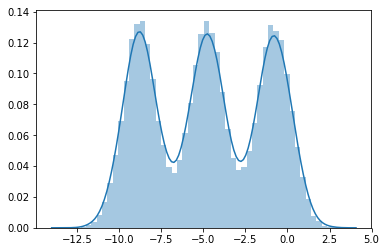

In [13]:
sns.distplot(input_data)

### Use Sklearn GaussianMixture model

In [14]:
#Use GaussianMixture modelling to get mu and sigma for each gaussian
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3,covariance_type='spherical')
gmm.fit(input_data)
print("Posteriors : ", gmm.weights_)
print("Means : ", gmm.means_)
print("Std-deviation", np.sqrt(gmm.covariances_))

Posteriors :  [ 0.33389442  0.33446741  0.33163817]
Means :  [[-0.78270151]
 [-8.79342345]
 [-4.77826338]]
Std-deviation [ 1.0069063   1.00266139  0.98861837]


### Implement EM Algorithm

In [21]:
#Implement EM algorithm

#Initialize the parameters
n_components=3
mu_vector = np.random.random((n_components,1))*10
sd_vector = np.random.random((n_components,1))
priors = np.ones(n_components)/n_components
probability_component_wise = np.zeros((n_samples,n_components))
likelihood = np.zeros((n_samples,n_components))

def gaussian_pdf(x,mu,sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1*(np.power(x-mu,2))/(2*np.power(sigma,2)))

In [22]:
# for iteration in range(100):

for iteration in range(500):
    #1. Expectation Step
    for component in range(n_components):
#         Calculate p(x|a)
        probability_component_wise[:,component] = np.apply_along_axis(gaussian_pdf,0,
                                      input_data,mu_vector[component],sd_vector[component]).reshape(-1,)

#     Calculate p(a|x)
    likelihood = probability_component_wise/probability_component_wise.sum(axis=1).reshape(-1,1)

    #2. Maximization step
    mu_vector = np.dot(likelihood.T,input_data)/likelihood.sum(axis=0).reshape(-1,1)
    for component in range(n_components):
        mean_deviated_input = np.square(np.subtract(input_data,mu_vector[component]))
        sd_vector[component] = np.sqrt(np.dot(
            likelihood[:,component].T,mean_deviated_input)/likelihood[:,component].sum(axis=0))[0]


print("posteriors : ", np.mean(likelihood,axis=0))
print(mu_vector)
print(sd_vector)
    

posteriors :  [ 0.33313032  0.33312002  0.33374966]
[[-0.77851494]
 [-4.77801014]
 [-8.79734227]]
[[ 1.00387262]
 [ 0.99782211]
 [ 0.99981765]]
